# 0. Imports and Data

In [1]:
import pandas as pd
import numpy as np

# simulated data for widget A
df_a = pd.DataFrame(
    {
        'Month': pd.date_range(
            start='01-01-2012',
            end='31-12-2022',
            freq='MS'
        ),
        'Quotes': np.random.randint(
            low=1_000_000,
            high=2_500_000,
            size=132
        ),
        'Numbers': np.random.randint(
            low=300_000,
            high=500_000,
            size=132
        ),
        'Amounts': np.random.randint(
            low=750_000,
            high=1_250_000,
            size=132
        )
    }
)

df_a['Product'] = 'A'

# simulated data for widget B
df_b = pd.DataFrame(
    {
        'Month': pd.date_range(
            start='01-01-2012',
            end='31-12-2022',
            freq='MS'
        ),
        'Quotes': np.random.randint(
            low=100_000,
            high=800_000,
            size=132
        ),
        'Numbers': np.random.randint(
            low=10_000,
            high=95_000,
            size=132
        ),
        'Amounts': np.random.randint(
            low=450_000,
            high=750_000,
            size=132
        )
    }
)

df_b['Product'] = 'B'

# put it together & sort
df = pd.concat([df_a, df_b], axis=0)
df.sort_values(by='Month', inplace=True)
df.reset_index(drop=True, inplace=True)

C:\Users\johnw\miniconda3\envs\575\lib\site-packages\IPython\core\interactiveshell.py:3361: UserWarning: Parsing '31-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\johnw\miniconda3\envs\575\lib\site-packages\IPython\core\interactiveshell.py:3361: UserWarning: Parsing '31-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# average sale
df['Average sale'] = df['Amounts'] / df['Numbers']

# conversion
df['Product conversion'] = df['Numbers'] / df['Quotes']

In [3]:
df = df.loc[:5]  # Just to limit the length of tables for the subsequent examples

In [4]:
df

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,2012-01-01,1660697,406316,1194786,A,2.940534,0.244666
1,2012-01-01,602210,55027,642528,B,11.676595,0.091375
2,2012-02-01,2348421,426296,774299,A,1.816341,0.181525
3,2012-02-01,578344,29754,700360,B,23.538348,0.051447
4,2012-03-01,2303146,473413,1131938,A,2.391016,0.205551
5,2012-03-01,124102,56484,741296,B,13.124000,0.455142


# 1. Formatting dates

In [5]:
# remove day of month from month column
df.style.format({'Month': '{:%Y-%m}'})

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,2012-01,1660697,406316,1194786,A,2.940534,0.244666
1,2012-01,602210,55027,642528,B,11.676595,0.091375
2,2012-02,2348421,426296,774299,A,1.816341,0.181525
3,2012-02,578344,29754,700360,B,23.538348,0.051447
4,2012-03,2303146,473413,1131938,A,2.391016,0.205551
5,2012-03,124102,56484,741296,B,13.124000,0.455142


In [6]:
# use full name of month
df.style.format({'Month': '{:%B %Y}'})

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,January 2012,1660697,406316,1194786,A,2.940534,0.244666
1,January 2012,602210,55027,642528,B,11.676595,0.091375
2,February 2012,2348421,426296,774299,A,1.816341,0.181525
3,February 2012,578344,29754,700360,B,23.538348,0.051447
4,March 2012,2303146,473413,1131938,A,2.391016,0.205551
5,March 2012,124102,56484,741296,B,13.124000,0.455142


In [7]:
# use abbreviated month name
df.style.format({'Month': '{:%b %Y}'})

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,Jan 2012,1660697,406316,1194786,A,2.940534,0.244666
1,Jan 2012,602210,55027,642528,B,11.676595,0.091375
2,Feb 2012,2348421,426296,774299,A,1.816341,0.181525
3,Feb 2012,578344,29754,700360,B,23.538348,0.051447
4,Mar 2012,2303146,473413,1131938,A,2.391016,0.205551
5,Mar 2012,124102,56484,741296,B,13.124000,0.455142


In [8]:
# year and month number, separated by letter 'M'
df.style.format({'Month': '{:%Y M%m}'})

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,2012 M01,1660697,406316,1194786,A,2.940534,0.244666
1,2012 M01,602210,55027,642528,B,11.676595,0.091375
2,2012 M02,2348421,426296,774299,A,1.816341,0.181525
3,2012 M02,578344,29754,700360,B,23.538348,0.051447
4,2012 M03,2303146,473413,1131938,A,2.391016,0.205551
5,2012 M03,124102,56484,741296,B,13.124000,0.455142


# 2. Formatting numbers with a thousand separator

In [9]:
# thousands separator for absolute numbers
df.style.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',  # <--
        'Numbers': '{:,.0f}'  # <--
    }
)

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,Jan 2012,"1,660,697","406,316",1194786,A,2.940534,0.244666
1,Jan 2012,"602,210","55,027",642528,B,11.676595,0.091375
2,Feb 2012,"2,348,421","426,296",774299,A,1.816341,0.181525
3,Feb 2012,"578,344","29,754",700360,B,23.538348,0.051447
4,Mar 2012,"2,303,146","473,413",1131938,A,2.391016,0.205551
5,Mar 2012,"124,102","56,484",741296,B,13.124000,0.455142


# 3. Formatting currencies

In [10]:
# currency formatting
df.style.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',      # <--
        'Average sale': '£{:,.2f}'  # <--
    }
)

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,Jan 2012,"1,660,697","406,316","£1,194,786",A,£2.94,0.244666
1,Jan 2012,"602,210","55,027","£642,528",B,£11.68,0.091375
2,Feb 2012,"2,348,421","426,296","£774,299",A,£1.82,0.181525
3,Feb 2012,"578,344","29,754","£700,360",B,£23.54,0.051447
4,Mar 2012,"2,303,146","473,413","£1,131,938",A,£2.39,0.205551
5,Mar 2012,"124,102","56,484","£741,296",B,£13.12,0.455142


In [11]:
# different currency representation
df.style.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '{:,.2f} (£)'  # <--
    }
)

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,Jan 2012,"1,660,697","406,316","£1,194,786",A,2.94 (£),0.244666
1,Jan 2012,"602,210","55,027","£642,528",B,11.68 (£),0.091375
2,Feb 2012,"2,348,421","426,296","£774,299",A,1.82 (£),0.181525
3,Feb 2012,"578,344","29,754","£700,360",B,23.54 (£),0.051447
4,Mar 2012,"2,303,146","473,413","£1,131,938",A,2.39 (£),0.205551
5,Mar 2012,"124,102","56,484","£741,296",B,13.12 (£),0.455142


# 4. Formatting percentages

In [12]:
# percentage formatting
df.style.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '£{:,.2f}',
        'Product conversion': '{:.2%}'  # <--
    }
)

,Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
0,Jan 2012,"1,660,697","406,316","£1,194,786",A,£2.94,24.47%
1,Jan 2012,"602,210","55,027","£642,528",B,£11.68,9.14%
2,Feb 2012,"2,348,421","426,296","£774,299",A,£1.82,18.15%
3,Feb 2012,"578,344","29,754","£700,360",B,£23.54,5.14%
4,Mar 2012,"2,303,146","473,413","£1,131,938",A,£2.39,20.56%
5,Mar 2012,"124,102","56,484","£741,296",B,£13.12,45.51%


# 5. Hiding the index

In [13]:
# suppress the index
df.style.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '£{:,.2f}',
        'Product conversion': '{:.2%}'
    }
).hide(axis='index')  # <--

Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
Jan 2012,"1,660,697","406,316","£1,194,786",A,£2.94,24.47%
Jan 2012,"602,210","55,027","£642,528",B,£11.68,9.14%
Feb 2012,"2,348,421","426,296","£774,299",A,£1.82,18.15%
Feb 2012,"578,344","29,754","£700,360",B,£23.54,5.14%
Mar 2012,"2,303,146","473,413","£1,131,938",A,£2.39,20.56%
Mar 2012,"124,102","56,484","£741,296",B,£13.12,45.51%


# 6. Conditional formatting

In [14]:
# function to conditionally highlight rows based on product
def highlight_product(s, product, colour='yellow'):
    r = pd.Series(data=False, index=s.index)
    r['Product'] = s.loc['Product'] == product
    return [f'background-color: {colour}' if r.any() else '' for v in r]


# apply the formatting
df.style\
.apply(highlight_product, product='A', colour='#DDEBF7', axis=1)\
.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '£{:,.2f}',
        'Product conversion': '{:.2%}'
    }
).hide(axis='index')

Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
Jan 2012,"1,660,697","406,316","£1,194,786",A,£2.94,24.47%
Jan 2012,"602,210","55,027","£642,528",B,£11.68,9.14%
Feb 2012,"2,348,421","426,296","£774,299",A,£1.82,18.15%
Feb 2012,"578,344","29,754","£700,360",B,£23.54,5.14%
Mar 2012,"2,303,146","473,413","£1,131,938",A,£2.39,20.56%
Mar 2012,"124,102","56,484","£741,296",B,£13.12,45.51%


In [15]:
# function to highlight rows based on average sale
def highlight_average_sale(s, sale_threshold=5):
    r = pd.Series(data=False, index=s.index)
    r['Product'] = s.loc['Average sale'] > sale_threshold
    return ['background-color: yellow' if r.any() else '' for v in r]

# apply the formatting
df.iloc[:6, :].style\
.apply(highlight_average_sale, sale_threshold=20, axis=1)\
.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '£{:,.2f}',
        'Product conversion': '{:.2%}'
    }
).hide(axis='index')

Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
Jan 2012,"1,660,697","406,316","£1,194,786",A,£2.94,24.47%
Jan 2012,"602,210","55,027","£642,528",B,£11.68,9.14%
Feb 2012,"2,348,421","426,296","£774,299",A,£1.82,18.15%
Feb 2012,"578,344","29,754","£700,360",B,£23.54,5.14%
Mar 2012,"2,303,146","473,413","£1,131,938",A,£2.39,20.56%
Mar 2012,"124,102","56,484","£741,296",B,£13.12,45.51%


In [16]:
# functions to change font colour based on a threshold
def colour_threshold_lessthan(value, threshold, colour='red'):
    if value < threshold:
        return f'color: {colour}'
    else:
        return ''


def colour_threshold_morethan(value, threshold, colour='green'):
    if value > threshold:
        return f'color: {colour}'
    else:
        return ''

    
# functions to change font weight based on a threshold    
def weight_threshold_lessthan(value, threshold):
    if value < threshold:
        return f'font-weight: bold'
    else:
        return ''

def weight_threshold_morethan(value, threshold):
    if value > threshold:
        return f'font-weight: bold'
    else:
        return ''

# apply the formatting
df.style\
.apply(highlight_product,product='A',colour='#DDEBF7', axis=1)\
.applymap(colour_threshold_lessthan, threshold=0.05, subset=['Product conversion'])\
.applymap(weight_threshold_lessthan, threshold=0.05, subset=['Product conversion'])\
.applymap(colour_threshold_morethan, threshold=0.2, subset=['Product conversion'])\
.applymap(weight_threshold_morethan, threshold=0.2, subset=['Product conversion'])\
.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '£{:,.2f}',
        'Product conversion': '{:.2%}'
    }
)\
.hide(axis='index')

Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
Jan 2012,"1,660,697","406,316","£1,194,786",A,£2.94,24.47%
Jan 2012,"602,210","55,027","£642,528",B,£11.68,9.14%
Feb 2012,"2,348,421","426,296","£774,299",A,£1.82,18.15%
Feb 2012,"578,344","29,754","£700,360",B,£23.54,5.14%
Mar 2012,"2,303,146","473,413","£1,131,938",A,£2.39,20.56%
Mar 2012,"124,102","56,484","£741,296",B,£13.12,45.51%


# 7. Table level changes: text alignment and captions

In [17]:
# align the text
df.style\
.set_properties(**{'text-align': 'center'})\
.apply(highlight_product, product='A', colour='#DDEBF7', axis=1)\
.applymap(lambda u: 'color: red' if u < 0.15 else '',subset=['Product conversion'])\
.applymap(lambda u: 'font-weight: bold' if u < 0.15 else '', subset=['Product conversion'])\
.applymap(lambda u: 'color: green' if u > 0.2 else '', subset=['Product conversion'])\
.applymap(lambda u: 'font-weight: bold' if u > 0.2 else '', subset=['Product conversion'])\
.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '£{:,.2f}',
        'Product conversion': '{:.2%}'
    }
)\
.set_caption('Sales data <br> Produced by Team X')\
.hide(axis='index')

Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
Jan 2012,"1,660,697","406,316","£1,194,786",A,£2.94,24.47%
Jan 2012,"602,210","55,027","£642,528",B,£11.68,9.14%
Feb 2012,"2,348,421","426,296","£774,299",A,£1.82,18.15%
Feb 2012,"578,344","29,754","£700,360",B,£23.54,5.14%
Mar 2012,"2,303,146","473,413","£1,131,938",A,£2.39,20.56%
Mar 2012,"124,102","56,484","£741,296",B,£13.12,45.51%


# 8. Putting it all together

In [18]:
# create a total "row" - i.e. column total
total = df.sum()
total['Month'] = pd.NaT
total['Product'] = ''
total['Average sale'] = total['Amounts'] / total['Numbers']
total['Product conversion'] = total['Numbers'] / total['Quotes']
total = total.to_frame().transpose()

C:\Users\johnw\AppData\Local\Temp\ipykernel_14824\890615142.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total = df.sum()


In [19]:
total

,Quotes,Numbers,Amounts,Product,Average sale,Product conversion,Month
0,7616920,1447290,5185207,,3.582701,0.19001,NaT


In [20]:
# function to highlight the total row
def highlight_total(s):
    r = pd.Series(data=False, index=s.index)
    r['Month'] = pd.isnull(s.loc['Month'])
    
    return ['font-weight: bold' if r.any() else '' for v in r]

In [21]:
# stack and reset index
d = pd.concat([df, total], axis=0)
d.reset_index(drop=True, inplace=True)

# apply formatting
d.style\
.set_properties(**{'text-align': 'center'})\
.apply(highlight_product, product='A', colour='#DDEBF7', axis=1)\
.apply(highlight_total, axis=1)\
.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '£{:,.2f}',
        'Product conversion': '{:.2%}'
    },
    na_rep='Total'
)\
.set_caption('Sales data <br> Produced by Team X')\
.hide(axis='index')

Month,Quotes,Numbers,Amounts,Product,Average sale,Product conversion
Jan 2012,"1,660,697","406,316","£1,194,786",A,£2.94,24.47%
Jan 2012,"602,210","55,027","£642,528",B,£11.68,9.14%
Feb 2012,"2,348,421","426,296","£774,299",A,£1.82,18.15%
Feb 2012,"578,344","29,754","£700,360",B,£23.54,5.14%
Mar 2012,"2,303,146","473,413","£1,131,938",A,£2.39,20.56%
Mar 2012,"124,102","56,484","£741,296",B,£13.12,45.51%
Total,"7,616,920","1,447,290","£5,185,207",,£3.58,19.00%


# 9. Export the magic

In [22]:
import dataframe_image as dfi
import os

# style the table
d_styled = d.style\
.set_properties(**{'text-align': 'center'})\
.apply(highlight_product, product='A', colour='#DDEBF7', axis=1)\
.apply(highlight_total, axis=1)\
.format(
    {
        'Month': '{:%b %Y}',
        'Quotes': '{:,.0f}',
        'Numbers': '{:,.0f}',
        'Amounts': '£{:,.0f}',
        'Average sale': '£{:,.2f}',
        'Product conversion': '{:.2%}'
    },
    na_rep='Total'
)\
.set_caption('Sales data <br> Produced by Team X')\
.hide(axis='index')

# export the table to PNG
export_destination = r'data/'
dfi.export(
    d_styled,
    os.path.join(
        export_destination,
        'styled_dataframe.png'
    )
)

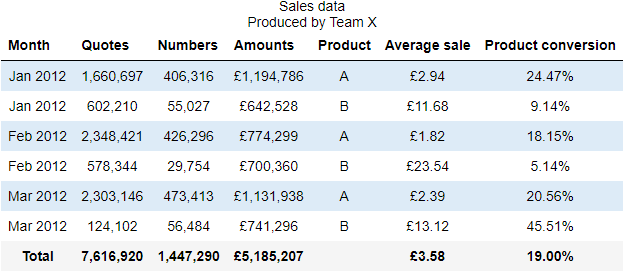

In [23]:
from IPython.display import Image


Image(filename="data/styled_dataframe.png")